In [50]:
# install dataset
!kaggle datasets download kartik2112/fraud-detection

Dataset URL: https://www.kaggle.com/datasets/kartik2112/fraud-detection
License(s): CC0-1.0
fraud-detection.zip: Skipping, found more recently modified local copy (use --force to force download)


In [51]:
# import libraries
import pandas as pd
import os
import zipfile
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap
from datetime import datetime
import seaborn as sns

In [52]:
# define variables
train_path = "/content/credit_card_fraud_detection/fraudTrain.csv"
test_path = "/content/credit_card_fraud_detection/fraudTest.csv"

In [53]:
# extract the dataset from zipfile
with zipfile.ZipFile("/content/fraud-detection.zip", "r") as file:
  file.extractall("credit_card_fraud_detection")

In [54]:
# load dataset
train_dataset = pd.read_csv(train_path, index_col = None)
test_dataset = pd.read_csv(test_path, index_col = None)

In [55]:
dataset = pd.concat([train_dataset, test_dataset])

In [56]:
# print 5 row from train dataset
dataset.sample(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
740948,740948,2019-11-12 17:14:45,4658490815480264,fraud_Berge-Ullrich,home,34.57,Tara,Richards,F,4879 Cristina Station,...,39.9636,-79.7853,184,Systems developer,1945-11-04,70d6c4ee336d51f361c45da28247f94e,1352740485,39.727050,-80.641282,0
49352,49352,2020-07-07 20:11:09,6011104316292105,fraud_Jast and Sons,food_dining,14.15,Valerie,Davis,F,3861 Anderson Ramp Apt. 536,...,36.9688,-78.5615,1970,Energy engineer,1985-09-02,b159f679324f91f42483a792c9c33258,1373227869,37.148951,-79.165595,0
553322,553322,2020-12-31 09:05:33,4862293128558,fraud_Miller-Hauck,grocery_pos,136.84,Elizabeth,Payne,F,897 Daugherty Mission,...,41.0036,-78.1104,489,Pension scheme manager,1956-09-15,18d9b6d13cfc99b98a2e470e5e8ab80f,1388480733,41.019387,-79.032170,0
593368,593368,2019-09-08 20:42:21,3534718226968689,"fraud_Ruecker, Beer and Collier",shopping_net,503.43,Lisa,Lopez,F,32343 Saunders Course,...,37.3712,-89.1349,2263,Scientific laboratory technician,1984-09-13,b67d423a109b564b62ab9d1c5757381b,1347136941,38.369564,-89.779035,0
203613,203613,2020-08-31 19:04:28,4469777115158234880,"fraud_Klocko, Runolfsdottir and Breitenberg",health_fitness,6.70,Gregory,Graham,M,4005 Dana Glens,...,42.7280,-71.1810,47249,Market researcher,1980-11-22,127438749a81557f362240e25f16ca4a,1377975868,42.957163,-72.126800,0


In [57]:
# print info of dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud               i

In [58]:
# print describe of dataset
dataset.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,5.371934e+05,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03
std,3.669110e+05,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,2.315490e+05,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00
50%,4.630980e+05,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00
75%,8.335758e+05,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [59]:
# print shape of dataset
dataset.shape

(1852394, 23)

In [60]:
# check quality : count cell to missing value
count_missing_value = dataset.isnull().sum()
print(f"Count the cells of missing value : \n{count_missing_value}\n")

Count the cells of missing value : 
Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64



In [61]:
# ckeck quality : count rows to duplicates
count_duplicates = dataset.duplicated().sum()
print(f"Count the duplicate rows : {count_duplicates}\n")

Count the duplicate rows : 0



In [62]:
# check quality : class inbalance - find the radio between 2 class "balance & Unbalance"
length_legitimate = dataset["is_fraud"].value_counts()[0]
length_fraudulent = dataset["is_fraud"].value_counts()[1]
print(f"Length of legitimate transaction : {length_legitimate} | {length_legitimate / len(dataset) * 100:.2f} % of the dataset")
print(f"Length of fraudulent transaction : {length_fraudulent} | {length_fraudulent / len(dataset) * 100:.2f} % of the dataset")

Length of legitimate transaction : 1842743 | 99.48 % of the dataset
Length of fraudulent transaction : 9651 | 0.52 % of the dataset


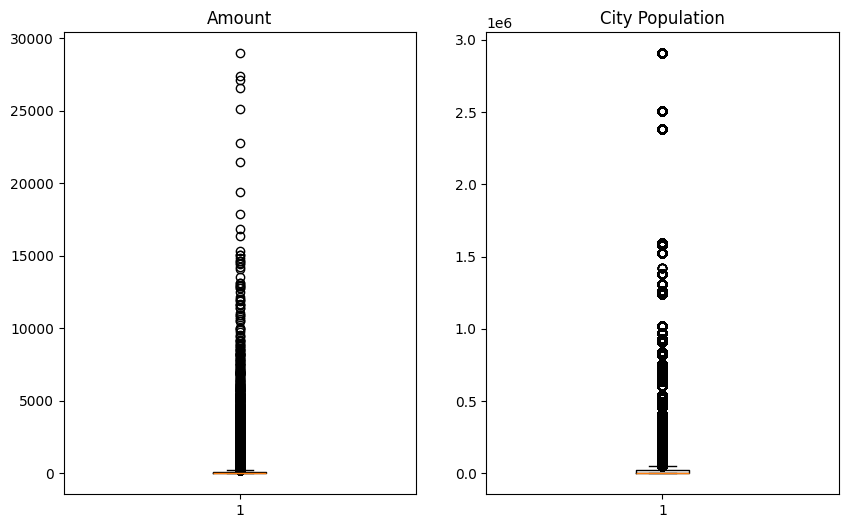

In [63]:
# check quality : outlier in amount and city_pop
plt.figure(figsize = (10,6))
plt.subplot(1, 2, 1) # (n_row, n_col, index)
plt.boxplot(dataset["amt"])
plt.title("Amount")
plt.subplot(1, 2, 2)
plt.boxplot(dataset["city_pop"])
plt.title("City Population")
plt.show()

In [64]:
# check quality : data integrity - check the lat and merch_lat from -90 to 90 or long and merch_long from -180 to 180
if dataset["lat"].between(-90, 90).all() and dataset["merch_lat"].between(-90, 90).all():
  print("Lat is valid")
if dataset["long"].between(-180, 180).all() and dataset["merch_long"].between(-180, 180).all():
  print("Long is valid")
else:
  print("Lat or Long is invalid")

Lat is valid
Long is valid


In [65]:
# data preprocessing : remove Unnamed: 0 column
dataset = dataset.drop("Unnamed: 0", axis = 1)
dataset.head(1)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0


In [66]:
# data preprocessing : change trans_date_trans_time column of data type from object to date time
dataset["trans_date_trans_time"] = pd.to_datetime(dataset["trans_date_trans_time"])
print(dataset["trans_date_trans_time"].dtype)

datetime64[ns]


In [67]:
# data preprocessing : change unix_time column of data type from int to date time
dataset["unix_time"] = pd.to_datetime(dataset["unix_time"], unit = "s")
print(dataset["unix_time"].dtype)

datetime64[ns]


In [68]:
# data preprocessing : contcat the first and last column in one column
# dataset["full_name"] = dataset["first"] + " " + dataset["last"]
# dataset = dataset.drop(["first", "last"], axis = 1)
# dataset.head(1)

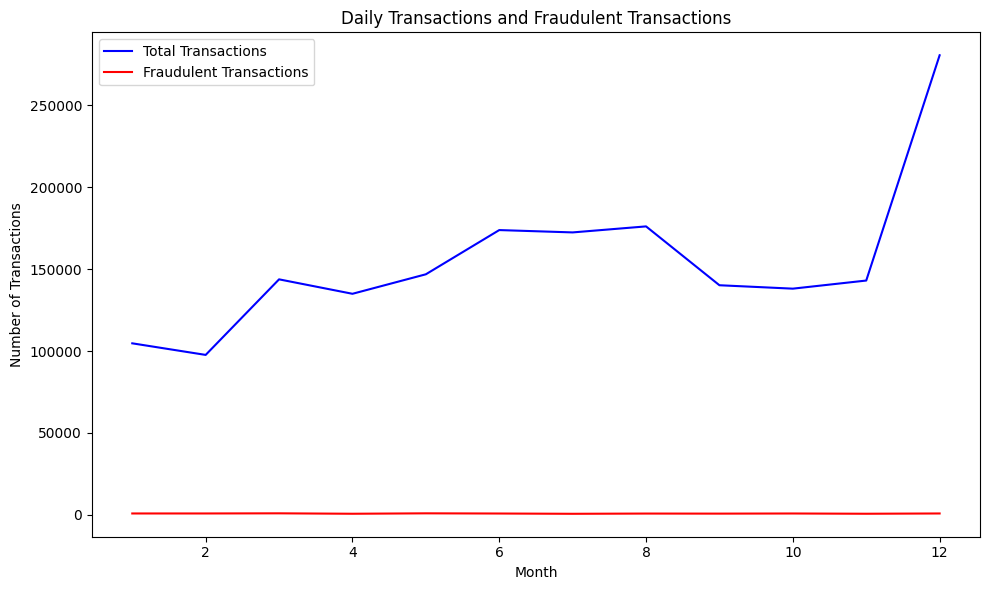

In [69]:
dataset["trans_month"] = dataset["trans_date_trans_time"].dt.month
daily_transactions = dataset.groupby('trans_month').size()
daily_fraud = dataset[dataset["is_fraud"] == 1].groupby("trans_month").size()
plt.figure(figsize = (10, 6))
plt.plot(daily_transactions.index, daily_transactions.values, label='Total Transactions', color='blue')
plt.plot(daily_fraud.index, daily_fraud.values, label='Fraudulent Transactions', color='red')

plt.title('Daily Transactions and Fraudulent Transactions')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.legend()

plt.tight_layout()
plt.show()

> A sudden increase in transactions in **`November and December`**, and here is the greatest possibility of fraud because there are discounts in these two months, such as Black Friday.

<Figure size 1000x600 with 0 Axes>

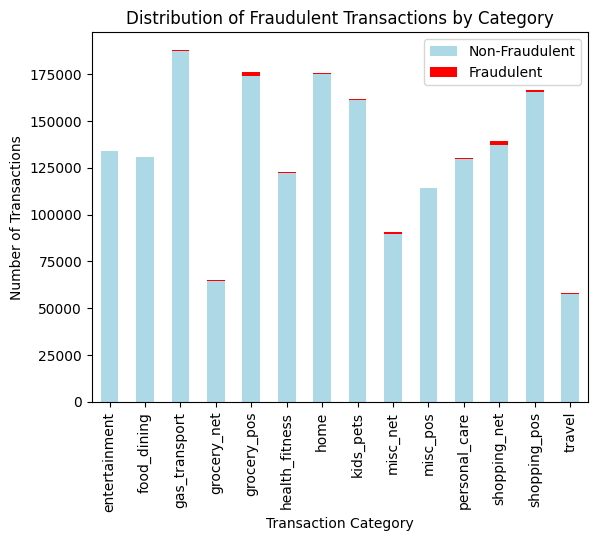

In [70]:
category_fraud = dataset.groupby(["category", "is_fraud"], observed=False).size().unstack(fill_value = 0)
plt.figure(figsize = (10, 6))
category_fraud.plot(kind = "bar", stacked = True, color=['lightblue', 'red'])

plt.title('Distribution of Fraudulent Transactions by Category')
plt.xlabel('Transaction Category')
plt.ylabel('Number of Transactions')
plt.xticks(rotation = 90)
plt.legend(['Non-Fraudulent', 'Fraudulent']);

> We confirm the previous chart, which shows that fraud occurs in November and December, **`through this chart, which shows that shopping of all kinds has the highest fraud rate.`**

In [71]:
fraud_data = dataset[dataset["is_fraud"] == 1]
map = folium.Map(location = [fraud_data["merch_lat"].mean(), fraud_data["merch_long"].mean()], zoom_start = 6)
# for index, row in fraud_data.iterrows():
#   folium.CircleMarker(
#       location = [row["merch_lat"], row["merch_long"]],
#       # radius = 5,
#       # color = "red",
#       # fill = True,
#       # fill_opacity=0.6,
#       # fill_color = "red"
#   ).add_to(map)

heat_map = [[row["merch_lat"], row["merch_long"]] for index, row in fraud_data.iterrows()]
HeatMap(heat_map).add_to(map)

map.save("fraud_map.html")
map

> Through this map we find that there is more than one point with fraud, with the greatest impact in **`the southern part of America`**.

In [72]:
# Finding distance from customer location to merchant location in degrees latitude and degrees longitude
dataset["lat_distance"] = abs(round(dataset["merch_lat"] - dataset["lat"], 3))
dataset["long_distance"] = abs(round(dataset["merch_long"] - dataset["long"], 3))

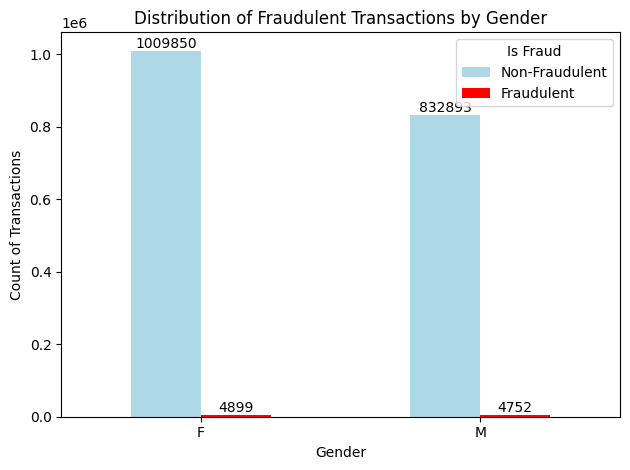

In [73]:
gender_fraud = dataset.groupby(["gender", "is_fraud"]).size().unstack(fill_value = 0)
gender_fraud["total"] = gender_fraud.sum(axis = 1)
gender_fraud_sorted = gender_fraud.sort_values(by = "total", ascending = False)
gender_fraud_sorted = gender_fraud_sorted.drop("total", axis = 1)
chart = gender_fraud_sorted.plot(kind = "bar", stacked = False, color = ["lightblue", "red"])
# Add chart labels and title
plt.title('Distribution of Fraudulent Transactions by Gender')
plt.xlabel('Gender')
plt.ylabel('Count of Transactions')
plt.xticks(rotation=0)
plt.legend(title='Is Fraud', labels=['Non-Fraudulent', 'Fraudulent'])

# Annotate bars with counts
for p in chart.patches:
    height = p.get_height()
    chart.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2., height),
                ha = 'center', va='center',
                fontsize = 10, color = 'black',
                xytext=(0, 5), textcoords = 'offset points')

# Display the plot
plt.tight_layout()
plt.show()

> This chart proves that the percentage of female transactions is greater than that of male transactions, including legitimate and fraudulent transactions.

Average age of individuals committing fraud: 53.33 years
Average age of individuals not committing fraud: 50.65 years


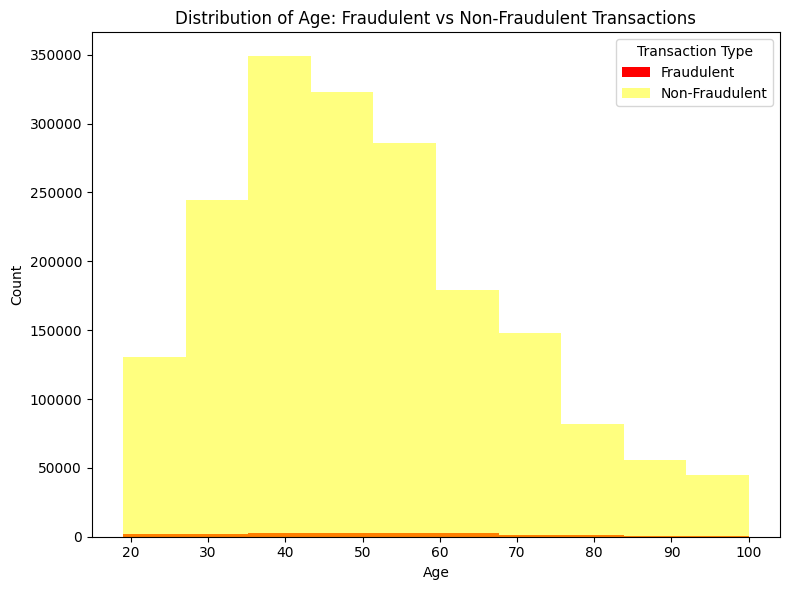

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

dataset['dob'] = pd.to_datetime(dataset['dob'])
today = datetime.today()
dataset['age'] = dataset['dob'].apply(lambda x: today.year - x.year - ((today.month, today.day) < (x.month, x.day)))

fraud_ages = dataset[dataset['is_fraud'] == 1]['age']
non_fraud_ages = dataset[dataset['is_fraud'] == 0]['age']

average_fraud_age = fraud_ages.mean()
average_non_fraud_age = non_fraud_ages.mean()

print(f"Average age of individuals committing fraud: {average_fraud_age:.2f} years")
print(f"Average age of individuals not committing fraud: {average_non_fraud_age:.2f} years")

plt.figure(figsize=(8, 6))
plt.hist(fraud_ages, bins = 5, alpha = 1, label = 'Fraudulent', color = 'red')
plt.hist(non_fraud_ages, bins = 10, alpha = 0.5, label = 'Non-Fraudulent', color = 'yellow')

plt.title('Distribution of Age: Fraudulent vs Non-Fraudulent Transactions')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Transaction Type')
plt.tight_layout()
plt.show()


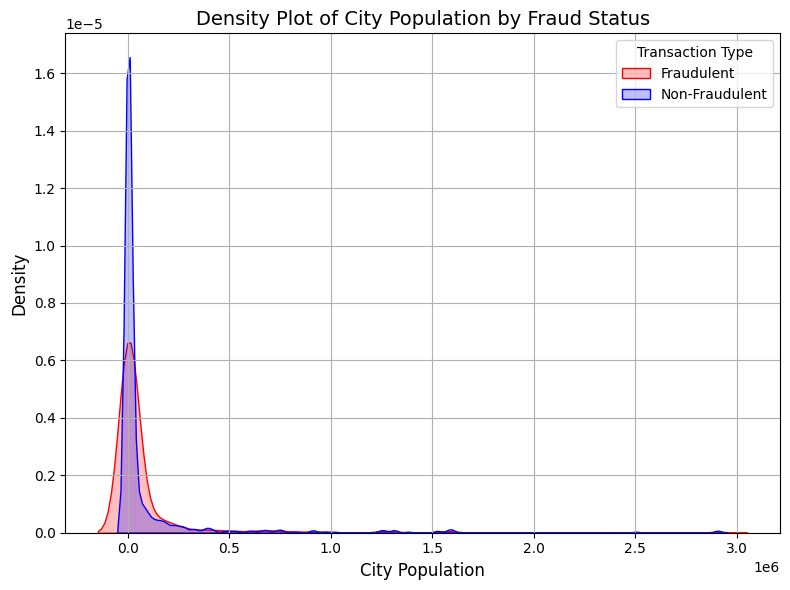

In [75]:
# Density plot with updated `fill` parameter
plt.figure(figsize=(8, 6))
sns.kdeplot(data=dataset[dataset['is_fraud'] == 1]['city_pop'], fill=True, label='Fraudulent', color='red')
sns.kdeplot(data=dataset[dataset['is_fraud'] == 0]['city_pop'], fill=True, label='Non-Fraudulent', color='blue')

# Enhance the chart
plt.title('Density Plot of City Population by Fraud Status', fontsize=14)
plt.xlabel('City Population', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Transaction Type')
plt.grid(True)
plt.tight_layout()
plt.show()

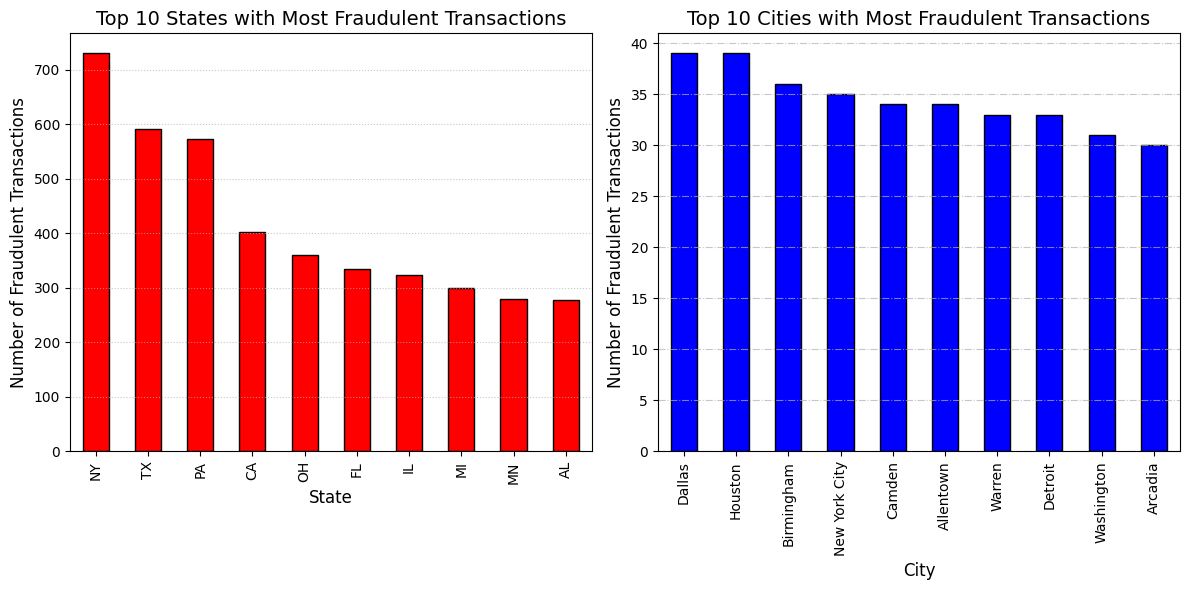

In [76]:
fraud_data = dataset[dataset['is_fraud'] == 1]
fraud_count_by_state = fraud_data['state'].value_counts()
fraud_count_by_city = fraud_data['city'].value_counts()
top_5_states = fraud_count_by_state.head(10)
top_5_cities = fraud_count_by_city.head(10)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
top_5_states.plot(kind='bar', color='red', edgecolor='black')
plt.title('Top 10 States with Most Fraudulent Transactions', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('Number of Fraudulent Transactions', fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle=':', alpha=0.7)

plt.subplot(1, 2, 2)
top_5_cities.plot(kind='bar', color='blue', edgecolor='black')
plt.title('Top 10 Cities with Most Fraudulent Transactions', fontsize=14)
plt.xlabel('City', fontsize=12)
plt.ylabel('Number of Fraudulent Transactions', fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='-.', alpha=0.7)

plt.tight_layout()
plt.show()

In [77]:
final_dataset = dataset[["category", "gender", "trans_month", "amt", "state", "lat_distance", "long_distance", "city_pop", "age", "is_fraud"]]
final_dataset.head()

,category,gender,trans_month,amt,state,lat_distance,long_distance,city_pop,age,is_fraud
0,misc_net,F,1,4.97,NC,0.068,0.870,3495,36,0
1,grocery_pos,F,1,107.23,WA,0.271,0.024,149,46,0
2,entertainment,M,1,220.11,ID,0.970,0.108,4154,62,0
3,gas_transport,M,1,45.00,MT,0.804,0.447,1939,57,0
4,misc_pos,M,1,41.96,VA,0.254,0.830,99,38,0


In [78]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
final_dataset.loc[:, "category"] = encoder.fit_transform(final_dataset["category"])
final_dataset.loc[:, "gender"] = encoder.fit_transform(final_dataset["gender"])
final_dataset.loc[:, "state"] = encoder.fit_transform(final_dataset["state"])

In [79]:
final_dataset.head()

,category,gender,trans_month,amt,state,lat_distance,long_distance,city_pop,age,is_fraud
0,8,0,1,4.97,27,0.068,0.870,3495,36,0
1,4,0,1,107.23,47,0.271,0.024,149,46,0
2,0,1,1,220.11,13,0.970,0.108,4154,62,0
3,2,1,1,45.00,26,0.804,0.447,1939,57,0
4,9,1,1,41.96,45,0.254,0.830,99,38,0


In [80]:
x = final_dataset.drop("is_fraud", axis = 1)
y = final_dataset["is_fraud"]

In [81]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [82]:
x_train_oversampling = x_train.copy()
y_train_oversampling = y_train.copy()

In [83]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, recall_score, precision_score

In [84]:
tree_model = DecisionTreeClassifier(
    criterion = "gini",
    splitter = "best",
    max_depth = 10,
    random_state = 42,
    class_weight = "balanced",
    ccp_alpha = 0.01,
  )

In [85]:
tree_model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.01, class_weight='balanced', max_depth=10,
                       random_state=42)

In [86]:
y_pred = tree_model.predict(x_test)

In [87]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9372182703848527
Precision: 0.07205807505826257
Recall: 0.9155888359428183
F1 Score: 0.13360152971268222
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97    552781
           1       0.07      0.92      0.13      2938

    accuracy                           0.94    555719
   macro avg       0.54      0.93      0.55    555719
weighted avg       0.99      0.94      0.96    555719



In [88]:
'''
class sklearn.ensemble.RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2,
min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0,
bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None,
ccp_alpha=0.0, max_samples=None, monotonic_cst=None)
'''

random_forst_model = RandomForestClassifier(
    n_estimators = 50,
    criterion = "gini",
    max_depth = 5,
    bootstrap = True,
    class_weight = "balanced",
    # ccp_alpha = 0.1,
    random_state = 42,
    max_features = "sqrt",
  )

In [89]:
model = random_forst_model.fit(x_train, y_train)

In [90]:
y_pred = tree_model.predict(x_test)

In [91]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9372182703848527
Precision: 0.07205807505826257
Recall: 0.9155888359428183
F1 Score: 0.13360152971268222
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97    552781
           1       0.07      0.92      0.13      2938

    accuracy                           0.94    555719
   macro avg       0.54      0.93      0.55    555719
weighted avg       0.99      0.94      0.96    555719



In [92]:
xgb_dataset = dataset[["category", "gender", "trans_month", "amt", "state", "lat_distance", "long_distance", "city_pop", "age", "is_fraud"]]
xgb_dataset.head()

,category,gender,trans_month,amt,state,lat_distance,long_distance,city_pop,age,is_fraud
0,misc_net,F,1,4.97,NC,0.068,0.870,3495,36,0
1,grocery_pos,F,1,107.23,WA,0.271,0.024,149,46,0
2,entertainment,M,1,220.11,ID,0.970,0.108,4154,62,0
3,gas_transport,M,1,45.00,MT,0.804,0.447,1939,57,0
4,misc_pos,M,1,41.96,VA,0.254,0.830,99,38,0


In [93]:
xgb_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 555718
Data columns (total 10 columns):
 #   Column         Dtype  
---  ------         -----  
 0   category       object 
 1   gender         object 
 2   trans_month    int32  
 3   amt            float64
 4   state          object 
 5   lat_distance   float64
 6   long_distance  float64
 7   city_pop       int64  
 8   age            int64  
 9   is_fraud       int64  
dtypes: float64(3), int32(1), int64(3), object(3)
memory usage: 148.4+ MB


In [104]:
for col in xgb_dataset.select_dtypes(include="object").columns:
    xgb_dataset = xgb_dataset[col].astype("category")

In [105]:
xx = xgb_dataset.drop("is_fraud", axis = 1)
yy = xgb_dataset["is_fraud"]

In [106]:
xx_train, xx_test, yy_train, yy_test = train_test_split(xx, yy, test_size = 0.3, random_state = 42)

In [107]:
import xgboost as xgb
train_dmatrix = xgb.DMatrix(xx_train, label = yy_train, enable_categorical = True)
test_dmatrix = xgb.DMatrix(xx_test, label = yy_test, enable_categorical = True)

In [108]:
# from xgboost import XGBClassifier
# xgb_model = XGBClassifier(
#     n_estimators=100,
#     learning_rate=0.01,
#     max_depth=8,
#     random_state=42,
#     gamma=1,
#     eval_metric='logloss',
#     early_stopping_rounds=10,
#     enable_categorical=True
# )

# xgb_model.fit(
#     xx_train, yy_train,
#     eval_set=[(xx_test, yy_test)],
# )

In [109]:
params = {
    "objecyive" : "binary:logistic",
    "n_estimators" : 150,
    "learning_rate" : 0.1,
    "max_depth" : 8,
    "random_state" : 42,
    "eval_metric": "logloss",
    "early_stopping_rounds": 10,
}

In [110]:
evals = [(test_dmatrix, "eval")]
num_round = 50
xgb_model = xgb.train(params, train_dmatrix, num_round, evals = evals)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:24:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "early_stopping_rounds", "n_estimators", "objecyive" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	eval-logloss:0.02132
[1]	eval-logloss:0.01826
[2]	eval-logloss:0.01643
[3]	eval-logloss:0.01512
[4]	eval-logloss:0.01414
[5]	eval-logloss:0.01335
[6]	eval-logloss:0.01272
[7]	eval-logloss:0.01219
[8]	eval-logloss:0.01185
[9]	eval-logloss:0.01147
[10]	eval-logloss:0.01108
[11]	eval-logloss:0.01081
[12]	eval-logloss:0.01052
[13]	eval-logloss:0.01029
[14]	eval-logloss:0.01009
[15]	eval-logloss:0.00990
[16]	eval-logloss:0.00975
[17]	eval-logloss:0.00962
[18]	eval-logloss:0.00955
[19]	eval-logloss:0.00944
[20]	eval-logloss:0.00941
[21]	eval-logloss:0.00926
[22]	eval-logloss:0.00925
[23]	eval-logloss:0.00922
[24]	eval-logloss:0.00917
[25]	eval-logloss:0.00912
[26]	eval-logloss:0.00921
[27]	eval-logloss:0.00917
[28]	eval-logloss:0.00912
[29]	eval-logloss:0.00909
[30]	eval-logloss:0.00910
[31]	eval-logloss:0.00917
[32]	eval-logloss:0.00913
[33]	eval-logloss:0.00913
[34]	eval-logloss:0.00897
[35]	eval-logloss:0.00897
[36]	eval-logloss:0.00896
[37]	eval-logloss:0.00897
[38]	eval-logloss:0.00

In [111]:
# Predict and evaluate
yy_pred = xgb_model.predict(test_dmatrix)
# Convert probabilities to binary predictions (0 or 1)
y_pred_binary = [1 if pred > 0.5 else 0 for pred in y_pred]

In [112]:
# Print the evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred_binary))
print("Precision:", precision_score(y_test, y_pred_binary))
print("Recall:", recall_score(y_test, y_pred_binary))
print("F1 Score:", f1_score(y_test, y_pred_binary))
print("Classification Report:\n", classification_report(y_test, y_pred_binary))

Accuracy: 0.9372182703848527
Precision: 0.07205807505826257
Recall: 0.9155888359428183
F1 Score: 0.13360152971268222
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97    552781
           1       0.07      0.92      0.13      2938

    accuracy                           0.94    555719
   macro avg       0.54      0.93      0.55    555719
weighted avg       0.99      0.94      0.96    555719



In [116]:
# Save the model to a file
import joblib

tree_model_file = "tree_model.pkl"
joblib.dump(tree_model, tree_model_file)
print(f"Model saved to {tree_model_file}")

Model saved to tree_model.pkl


In [117]:
# Save the model to a file
random_forst_model_file = "random_forst_model.pkl"
joblib.dump(random_forst_model, random_forst_model_file)
print(f"Model saved to {random_forst_model_file}")

Model saved to random_forst_model.pkl


In [118]:
# Save the model to a file
xgboost_model_file = "xgboost_model.pkl"
joblib.dump(xgb_model, xgboost_model_file)
print(f"Model saved to {xgboost_model_file}")

Model saved to xgboost_model.pkl
